In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

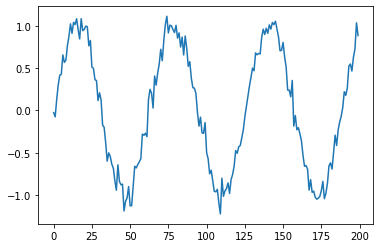

In [5]:
#make the original data
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1

#plot it
plt.plot(series)
plt.show()

In [19]:
## build the dataset
#let's see if we can use T past values to predict the next value
T = 10
X = []
Y = []
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)

X= np.array(X).reshape(-1,T)
Y= np.array(Y)
N = len(X)
print('X.shape', X.shape, 'Y.shape', Y.shape)

X.shape (190, 10) Y.shape (190,)


In [26]:
### try autoregressive linear model
i= Input(shape=(T,))
x = Dense(1)(i)
model = Model(i,x)
model.compile(loss='mse',
              optimizer = Adam(lr=0.1))

#Train the RNN
r = model.fit(X[:-N//2],Y[:-N//2],
              epochs=80,
              validation_data=(X[-N//2:],Y[-N//2:]))

Epoch 1/80
3/3 [==============================] - 0s 27ms/step - loss: 0.4620 - val_loss: 0.3880
Epoch 2/80
3/3 [==============================] - 0s 14ms/step - loss: 0.2452 - val_loss: 0.1127
Epoch 3/80
3/3 [==============================] - 0s 14ms/step - loss: 0.1731 - val_loss: 0.1183
Epoch 4/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0672 - val_loss: 0.0521
Epoch 5/80
3/3 [==============================] - 0s 13ms/step - loss: 0.1056 - val_loss: 0.0648
Epoch 6/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0602 - val_loss: 0.0641
Epoch 7/80
3/3 [==============================] - 0s 14ms/step - loss: 0.0931 - val_loss: 0.0516
Epoch 8/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0566 - val_loss: 0.0536
Epoch 9/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0655 - val_loss: 0.0287
Epoch 10/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0312 - val_loss: 0.0312
Epoch 11/80
3/3 [============

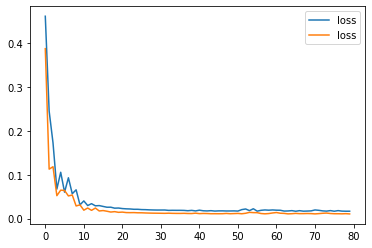

In [29]:
#Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='loss')
plt.legend()

In [0]:
# Wrong forecast using true targets

validation_target = Y[-N//2:]
validation_predictions=[]

#index of firts validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1,-1))[0,0] # 1x1 array - > scalar
  i+= 1

  #update the predictions list
  validation_predictions.append(p)

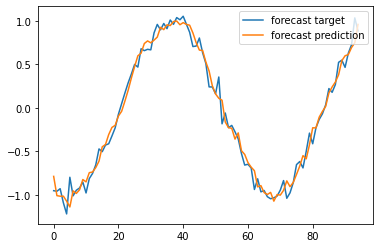

In [37]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [0]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions =[]

#firts validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1,-1))[0,0] # 1x1 array ->scalar

  #update the predictions list
  validation_predictions.append(p)

  #make the new input
  last_x = np.roll(last_x,-1)
  last_x[-1] = p

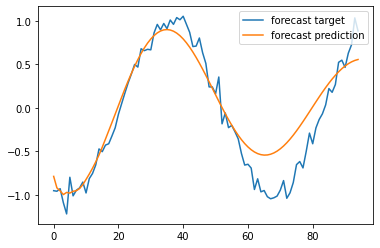

In [50]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label ='forecast prediction')
plt.legend()